In [1]:
# Load Libraries
library(Seurat)
library(SeuratWrappers)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
# Set Working Directory
setwd("../")

# Load Data

In [3]:
xenium.wto <- readRDS("GBMProject/GBMOrganoid/Checkpoints/XENIUM_WT.rds")

In [4]:
xenium.pro <- readRDS("GBMProject/GBMOrganoid/Checkpoints/XENIUM_PRO.rds")

In [5]:
xenium.mes <- readRDS("GBMProject/GBMOrganoid/Checkpoints/XENIUM_MES.rds")

# Fig 3a - Xenium Cell Type Plots

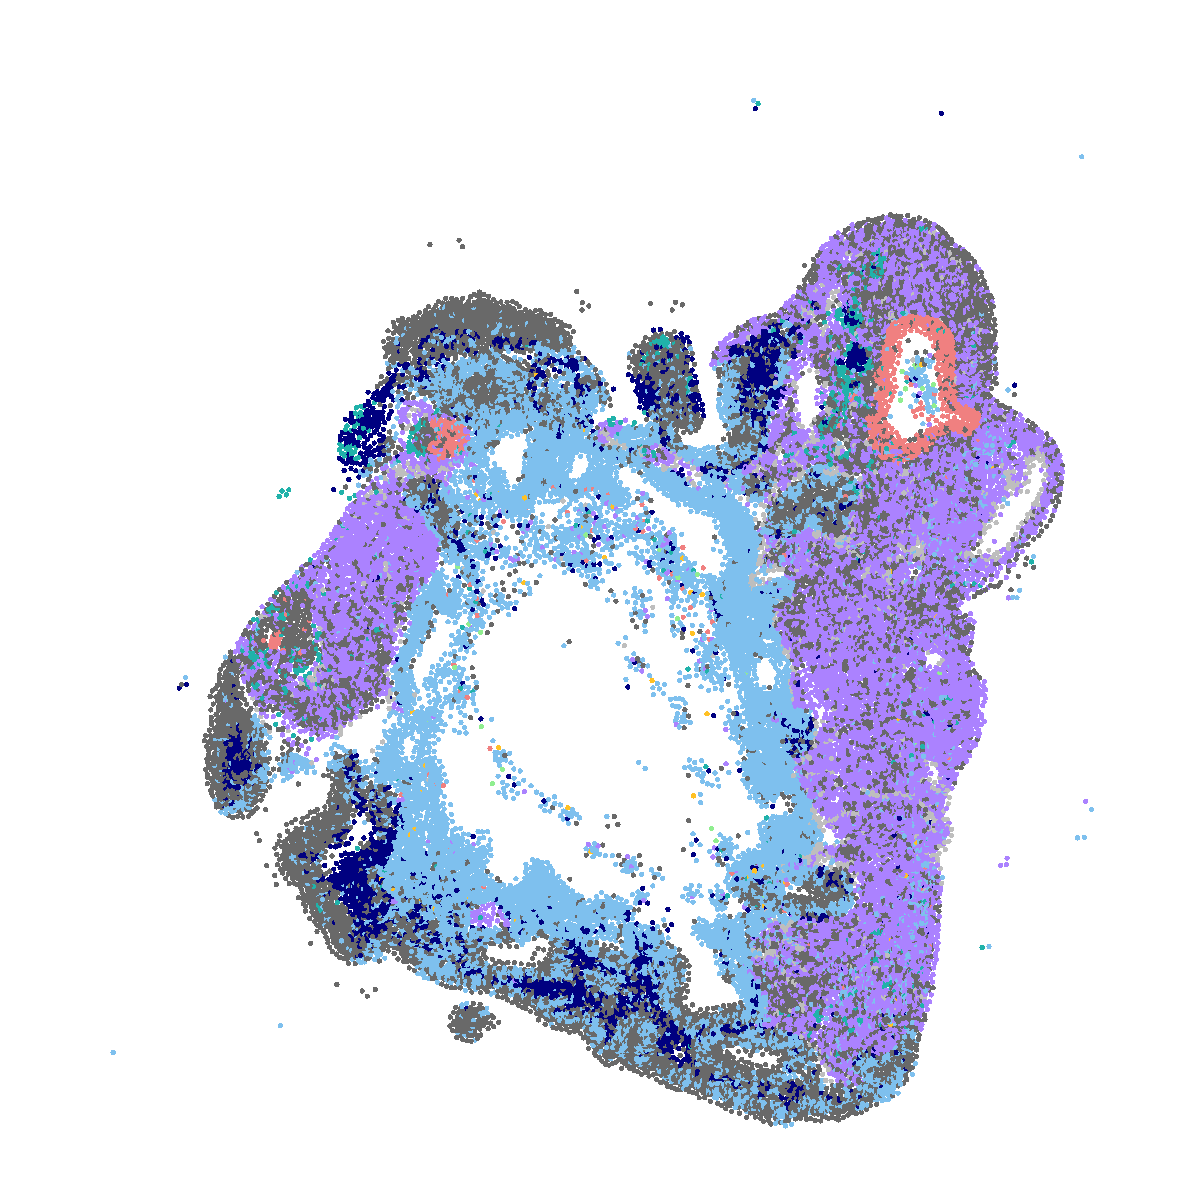

In [6]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter

wt.plot <- ImageDimPlot(xenium.wto, group.by = "predicted.celltype", size = 1.5, dark.background = FALSE,
                             cols=c("Mesenchyme"="mediumpurple1","Radial Glia"="skyblue2","Proliferating"="dimgray","Neuronal"="navyblue",
              "Proliferating"="dimgray","Neuroepithelial"="lightcoral",
              "Neural Crest"="lightseagreen","Retina Progenitor"="goldenrod1",
              "Endothelial"="gray","Microglia"="lightgreen")) + ggtitle("") + NoLegend()

wt.plot

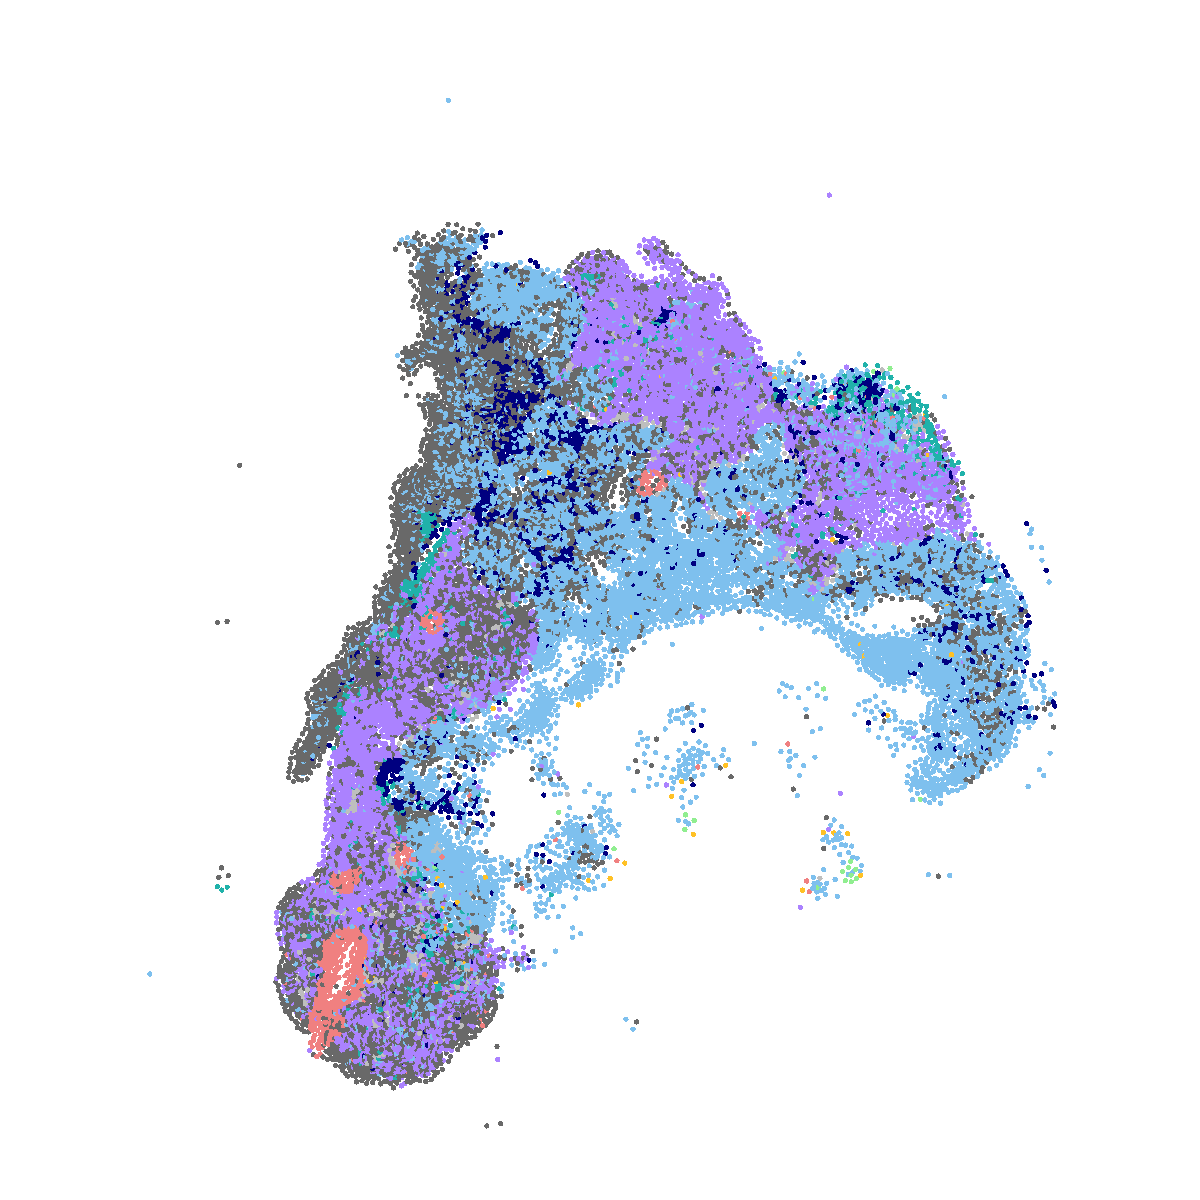

In [7]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter

pro.plot <- ImageDimPlot(xenium.pro, group.by = "predicted.celltype", size = 1.5, dark.background = F,
                             cols=c("Mesenchyme"="mediumpurple1","Radial Glia"="skyblue2","Proliferating"="dimgray","Neuronal"="navyblue",
              "Proliferating"="dimgray","Neuroepithelial"="lightcoral",
              "Neural Crest"="lightseagreen","Retina Progenitor"="goldenrod1",
              "Endothelial"="gray","Microglia"="lightgreen")) + ggtitle("") + NoLegend()

pro.plot

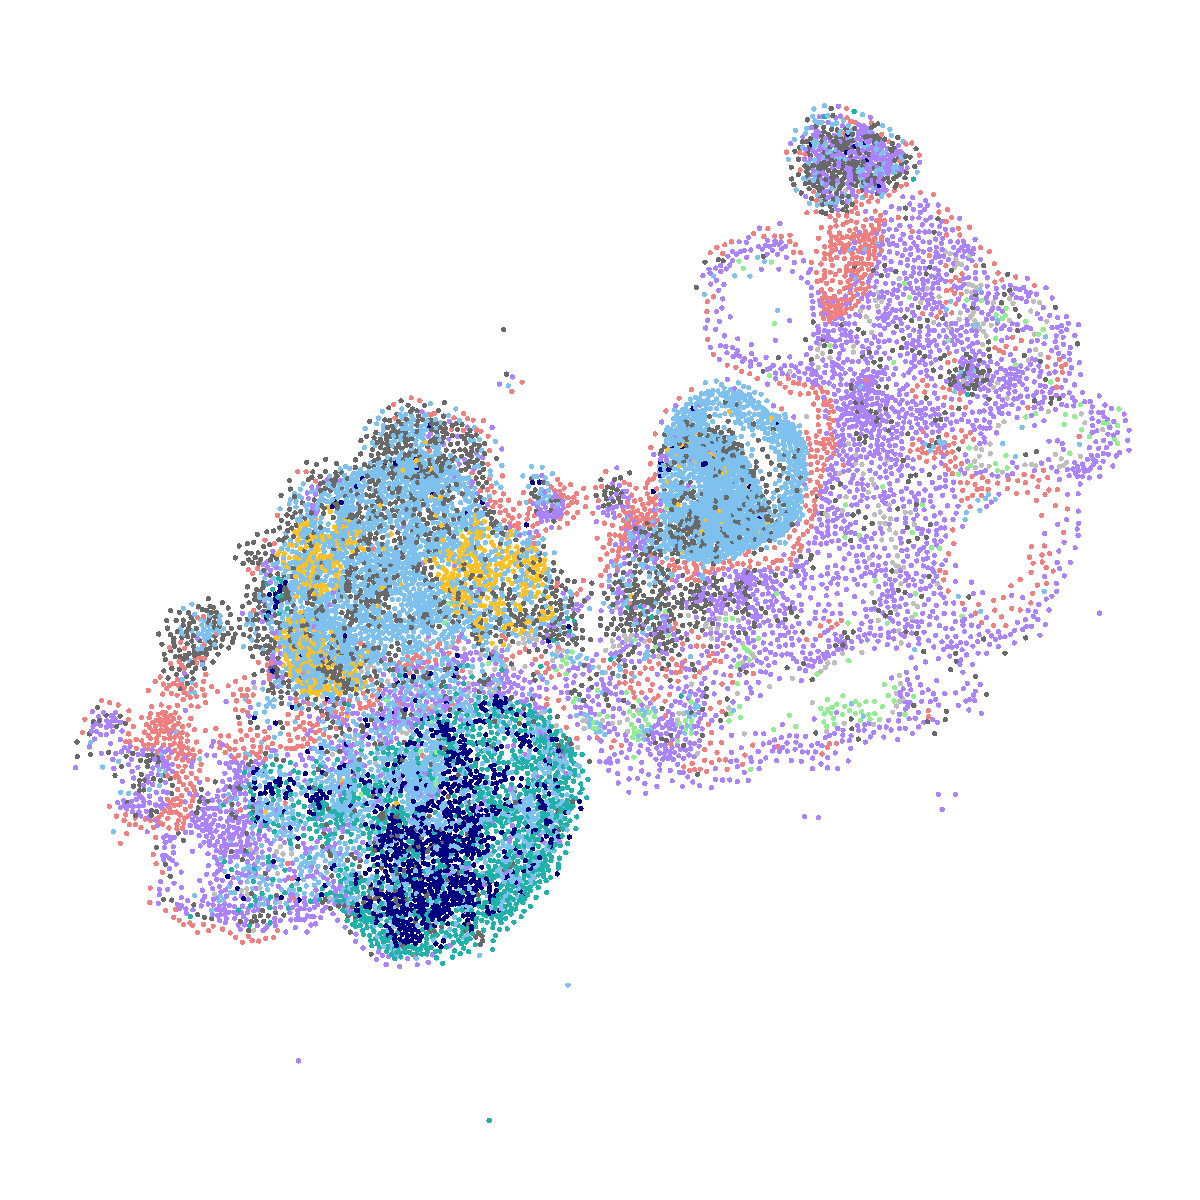

In [8]:
options(repr.plot.width=10, repr.plot.height=10) # To set the figure size in Jupyter

mes.plot <- ImageDimPlot(xenium.mes, group.by = "predicted.celltype", size = 1.5, dark.background = F,
                             cols=c("Mesenchyme"="mediumpurple1","Radial Glia"="skyblue2","Proliferating"="dimgray","Neuronal"="navyblue",
              "Proliferating"="dimgray","Neuroepithelial"="lightcoral",
              "Neural Crest"="lightseagreen","Retina Progenitor"="goldenrod1",
              "Endothelial"="gray","Microglia"="lightgreen")) + ggtitle("") + NoLegend()

mes.plot

# Fig 3b - Bar Graph

In [9]:
# Calculate cell type proportions
prop.celltype.wt <- data.frame(prop.table(table(xenium.wto$predicted.celltype)))
prop.celltype.wt$HTO <- 'WT'
prop.celltype.pro <- data.frame(prop.table(table(xenium.pro$predicted.celltype)))
prop.celltype.pro$HTO <- 'PRO'
prop.celltype.mes <- data.frame(prop.table(table(xenium.mes$predicted.celltype)))
prop.celltype.mes$HTO <- 'MES'

prop.celltype <- rbind(prop.celltype.wt, prop.celltype.pro)
prop.celltype <- rbind(prop.celltype, prop.celltype.mes)

In [10]:
colnames(prop.celltype) <- c("CellType","Frac", "HTO")
prop.celltype$CellType <- as.character(prop.celltype$CellType)

prop.celltype$CellType <- factor(prop.celltype$CellType, levels=c("Proliferating","Radial Glia",
                                                                 "Mesenchyme","Neuronal",
                                                                 "Neuroepithelial","Neural Crest",
                                                                  "Retina Progenitor", "Microglia","Endothelial"))

myColors <- c("dimgray","skyblue3","mediumpurple1","navyblue",
              "lightcoral","lightseagreen","goldenrod1","lightgreen","gray")

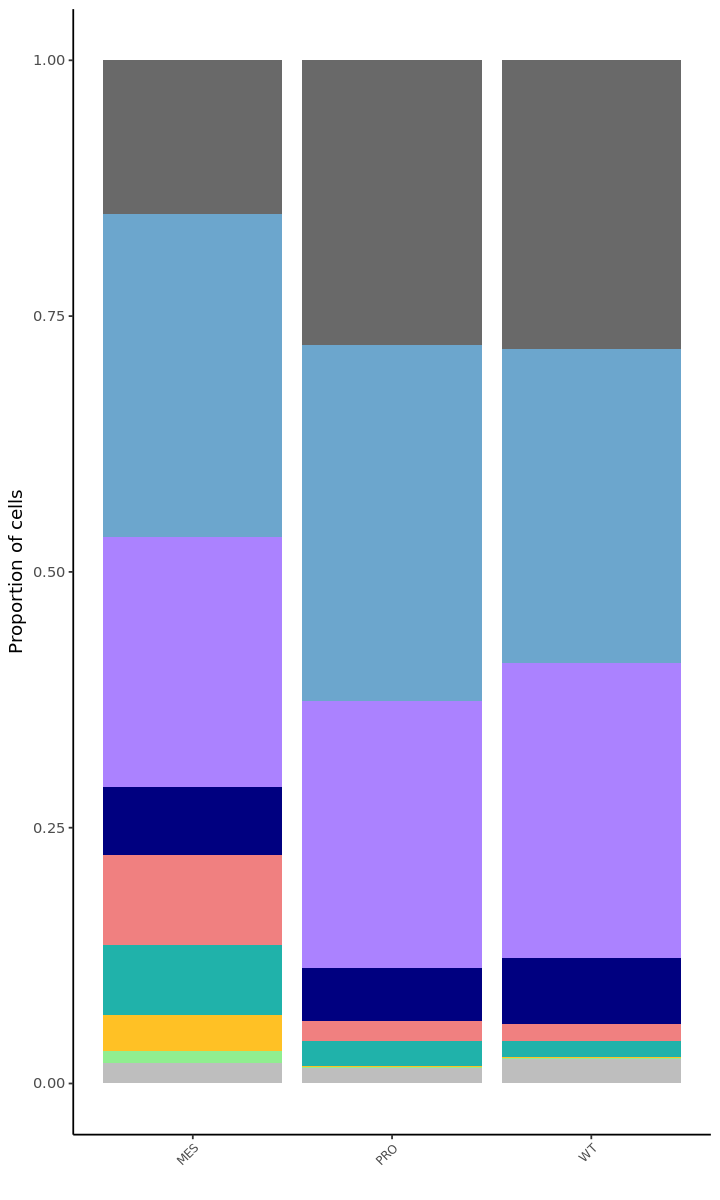

In [11]:
options(repr.plot.width = 6, repr.plot.height = 10)

prop.plot <- ggplot(prop.celltype, aes(fill=factor(CellType), y=Frac, x=HTO)) +
  geom_bar(position="fill", stat="identity", width = 0.90) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + scale_fill_manual(values=myColors) + NoLegend()

prop.plot

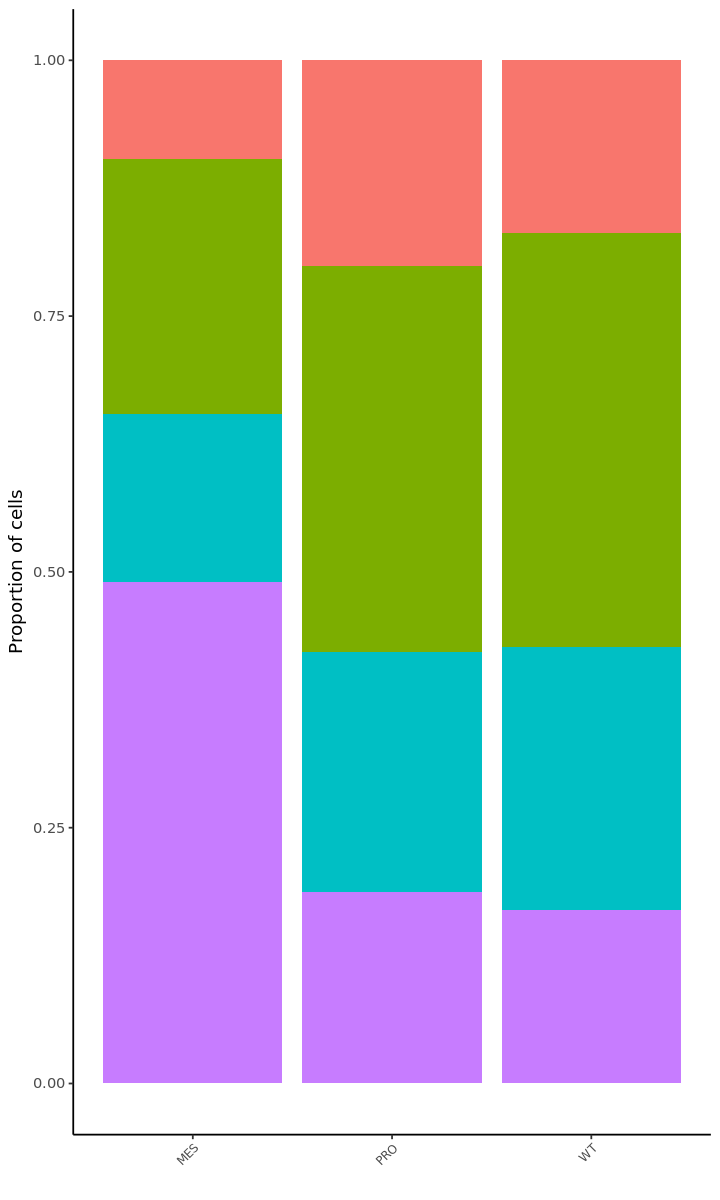

In [13]:
data <- read.csv('GBMProject/GBMOrganoid/Metrics/ClusterProps.csv')

options(repr.plot.width = 6, repr.plot.height = 10)

prop.plot <- ggplot(data, aes(fill=factor(cluster_cellcharter), y=Freq, x=Sample)) +
  geom_bar(position="fill", stat="identity", width = 0.90) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 7)) +
  labs(x = "", y = "Proportion of cells") +
  guides(fill = guide_legend(title="Cell Type")) + NoLegend()

prop.plot